In [18]:
import pandas as pd

# Shap for decision Tree

Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


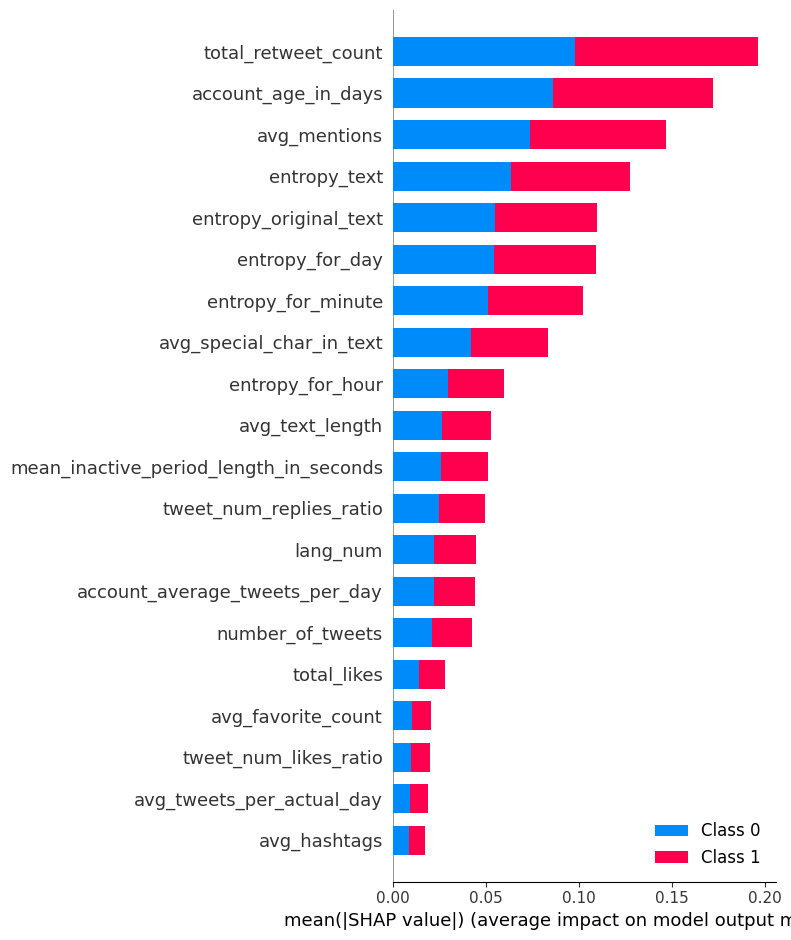

In [19]:
#load the dataset and repeat the same data preprocessing as in the DecisionTree notebook

import shap
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("dataset/users_df_dataset_cleaned_with_indicators.csv")
var = sorted(df['lang'].unique())
mapping = dict(zip(var, range(0, len(var) + 1)))
df['lang_num'] = df['lang'].map(mapping).astype(int)
df.drop(columns='lang', inplace=True)
columns_to_drop = ["user_id", "name", "created_at", "day_with_most_tweets"]
df.drop(columns=columns_to_drop, inplace=True)
label = df.pop("bot")
categoric_col_names = df.columns.values.tolist()
del categoric_col_names[:-1]
numeric_col_names = df.columns.values.tolist()
del numeric_col_names[-1]
standard_scaler = StandardScaler().fit(df[numeric_col_names])
df[numeric_col_names] = standard_scaler.transform(df[numeric_col_names])
X = df
y = label

#load the model

import pickle
bb = None
with open("./models/Dtree_28_depth_object", "rb") as file:
    bb = pickle.load(file)

#show a summary of the feature importance

shap_values_tree = shap.TreeExplainer(bb).shap_values(X)
shap.summary_plot(shap_values_tree, X)

In [23]:
shap_interaction_values_tree = shap.TreeExplainer(bb).shap_interaction_values(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


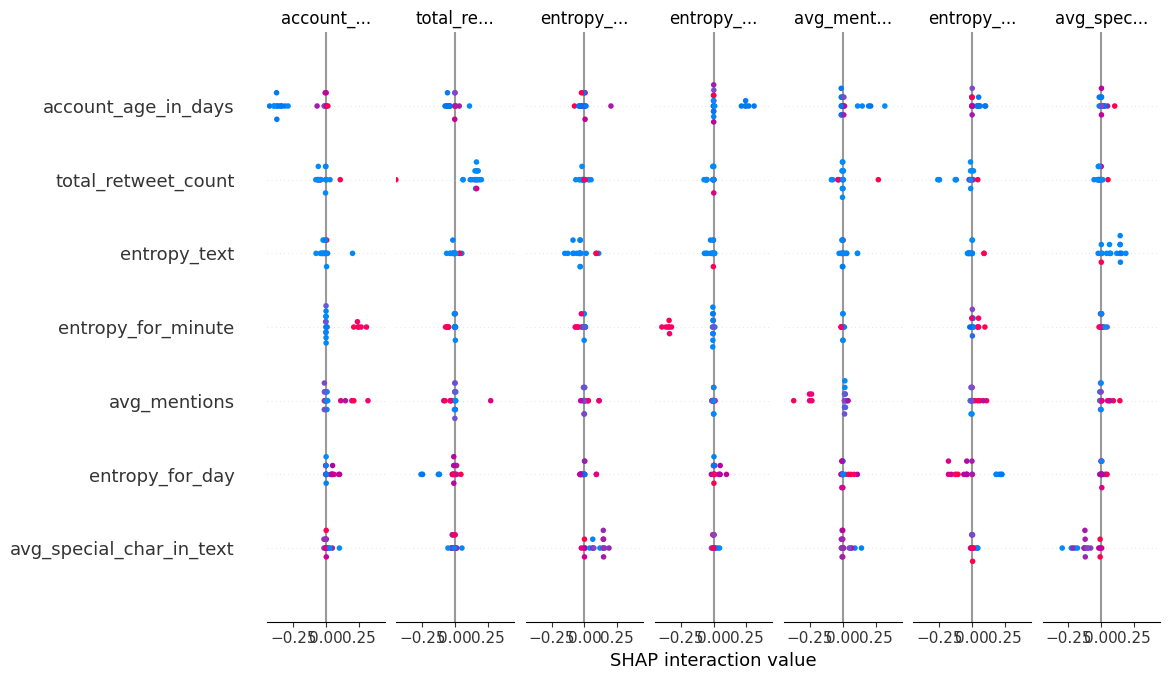

In [ ]:
shap.summary_plot(shap_interaction_values_tree[1], X)

In [ ]:
shap.dependence_plot(
    ("age", "workclass"),
    shap_interaction_values_tree[0], X
)